In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv(r'D:\Portfolio Projects\Supply Chain\archive (3)\supply_chain_data.csv')

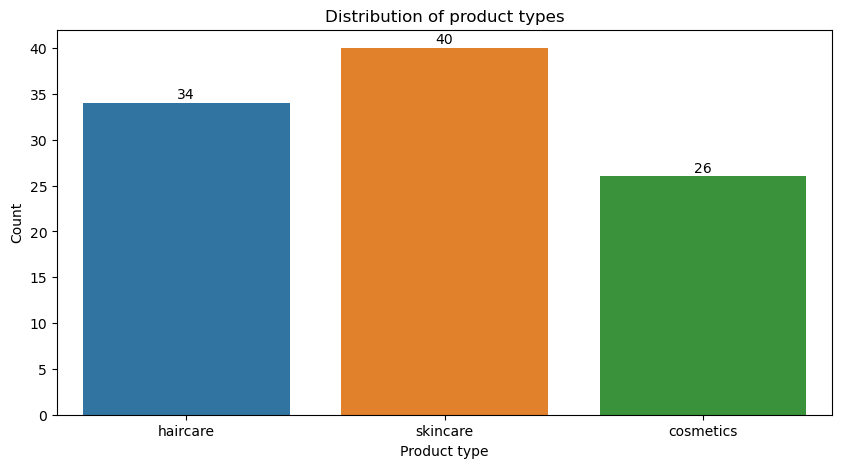

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Product type')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 6), 
                textcoords = 'offset points')
sns.countplot(data=df, x='Product type')
plt.title('Distribution of product types')
plt.xlabel('Product type')
plt.ylabel('Count')
plt.show()

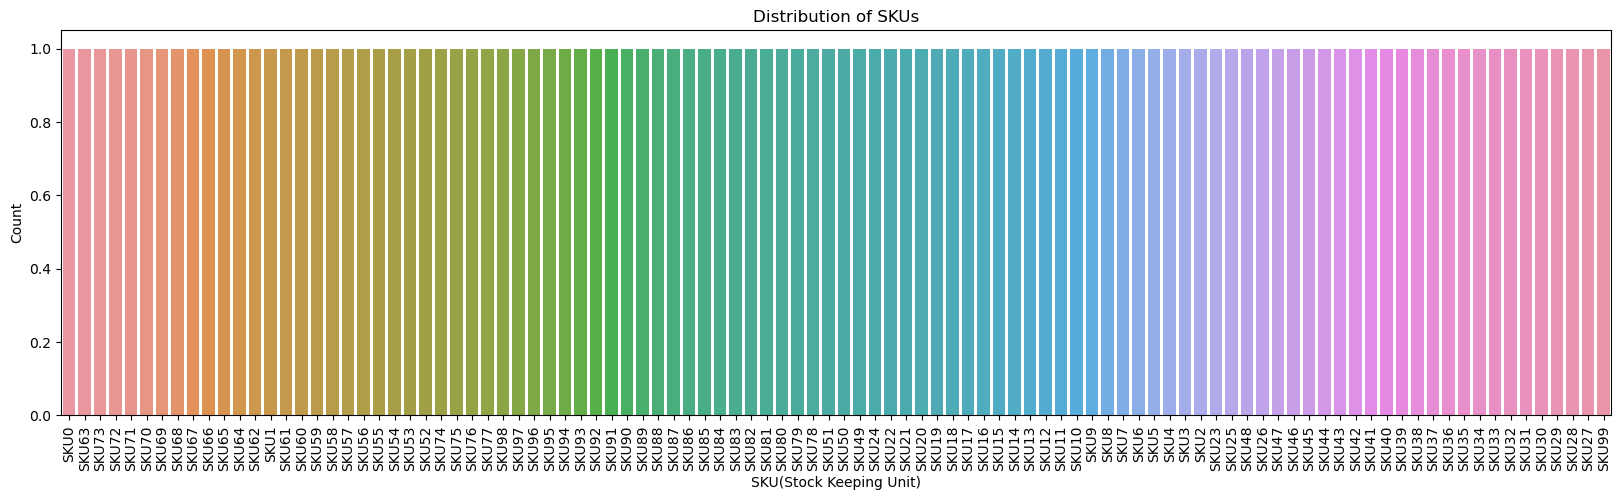

In [34]:
plt.figure(figsize=(20,5))
sku_count_plot = sns.countplot(data=df, x='SKU(Stock Keeping Unit)', order=df['SKU(Stock Keeping Unit)'].value_counts().index)
plt.title('Distribution of SKUs')
plt.xlabel('SKU(Stock Keeping Unit)')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

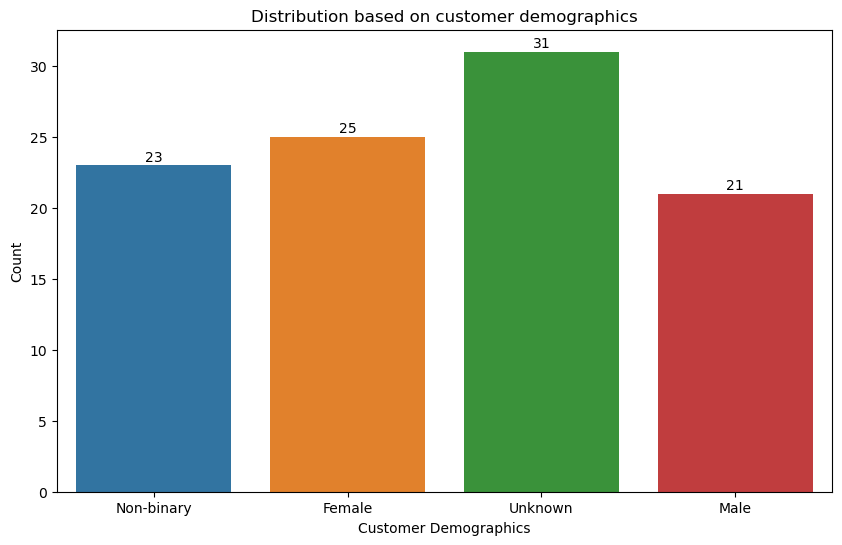

In [79]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Customer demographics')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 6), 
                textcoords = 'offset points')
customer_demographics_plot = sns.countplot(data=df, x='Customer demographics')
plt.title("Distribution based on customer demographics")
plt.xlabel('Customer Demographics')
plt.ylabel('Count')
plt.show()

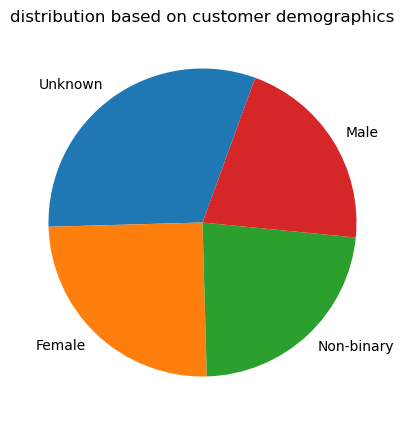

In [20]:
demographics_count = df['Customer demographics'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(demographics_count, labels=demographics_count.index, startangle=70)
plt.title('distribution based on customer demographics')
plt.show()

In [31]:
total_price_by_product = df.groupby('Product type')['Price'].sum()
print(total_price_by_product)


Product type
cosmetics    1491.387498
haircare     1564.485482
skincare     1890.373155
Name: Price, dtype: float64


In [55]:
total_price_by_product = df.groupby('Product type')['Price'].mean()
print(total_price_by_product)


Product type
cosmetics    57.361058
haircare     46.014279
skincare     47.259329
Name: Price, dtype: float64


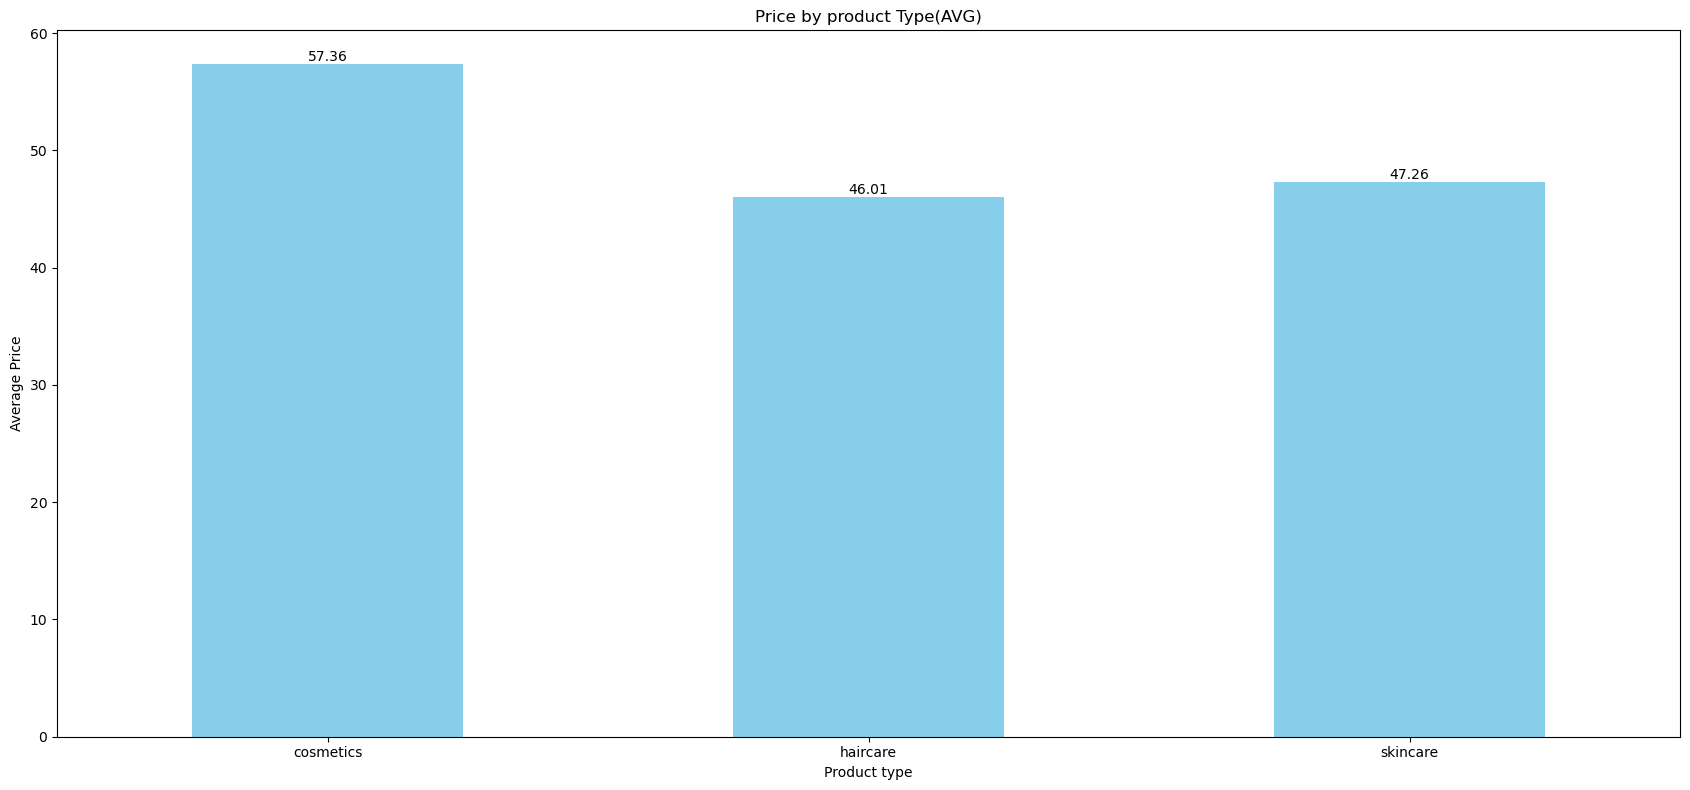

In [44]:
total_price_by_product = df.groupby('Product type')['Price'].mean()
plt.figure(figsize=(17,8))
ax = total_price_by_product.plot(kind='bar', color='skyblue')
plt.title('Price by product Type(AVG)')
plt.xlabel('Product type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(),2),ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

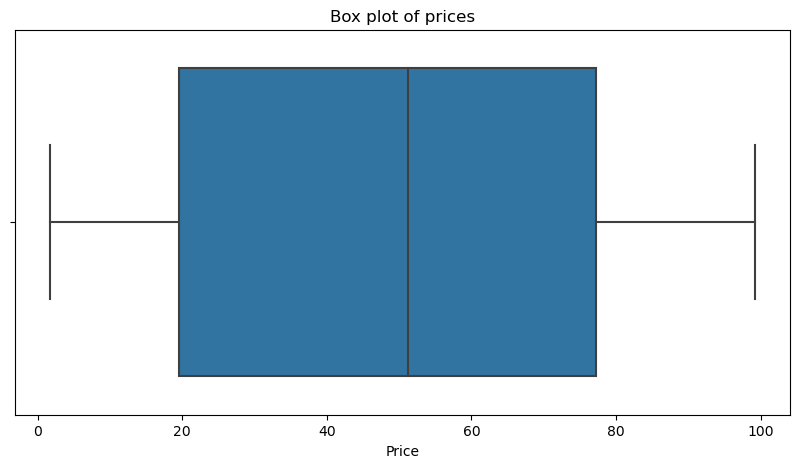

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price'])
plt.title('Box plot of prices')
plt.xlabel('Price')
plt.show()

In [62]:
total_availability = df.groupby('Product type')['Availability'].sum()
print(total_availability)

Product type
cosmetics    1332
haircare     1471
skincare     2037
Name: Availability, dtype: int64


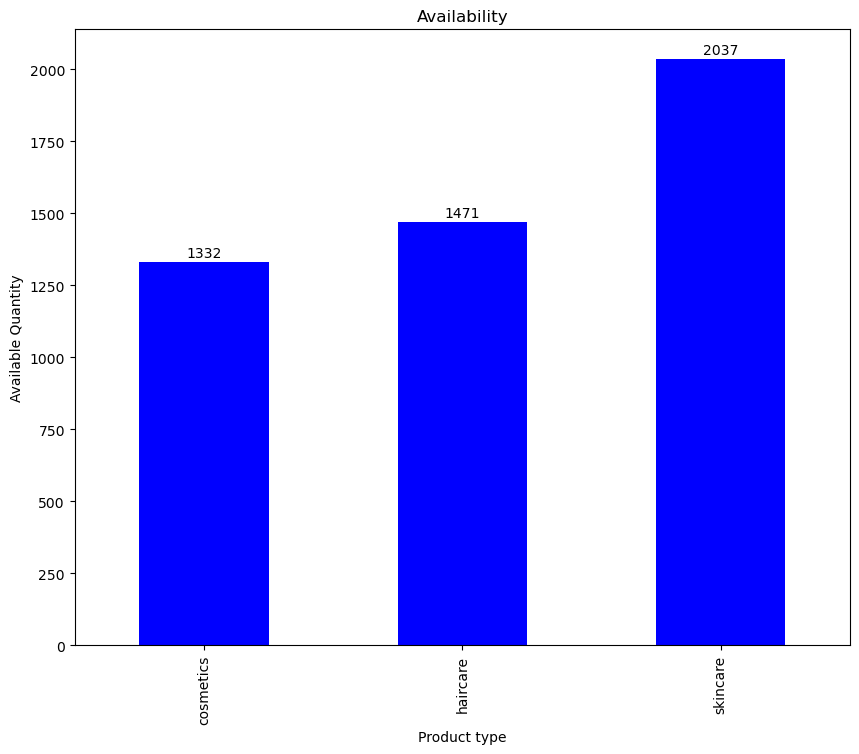

In [80]:
total_availability = df.groupby('Product type')['Availability'].sum()
plt.figure(figsize=(10,8))
ax = total_availability.plot(kind= 'bar', color = 'Blue')
plt.title('Availability')
plt.xlabel('Product type')
plt.ylabel('Available Quantity')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 6), 
                textcoords = 'offset points')
plt.show()

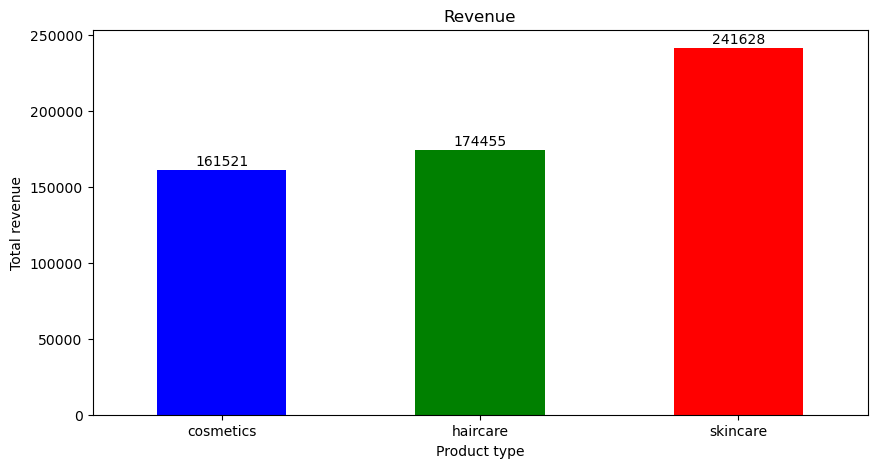

In [10]:
total_revenue = df.groupby('Product type')['Revenue generated'].sum()
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10,5))
ax = total_revenue.plot(kind='bar', color = colors)
plt.title('Revenue')
plt.xlabel('Product type')
plt.ylabel('Total revenue')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,6),
                textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.show()

In [36]:
data = df['Product type']
grouped_data = df.groupby(['Supplier name', 'Transportation modes']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Supplier name', columns='Transportation modes', values = 'Count')
pivoted_data = pivoted_data.fillna(0)
print(pivoted_data)

Transportation modes  Air  Rail  Road  Sea
Supplier name                             
Supplier 1             13     4     7    3
Supplier 2              4    12     2    4
Supplier 3              1     3     6    5
Supplier 4              4     4     8    2
Supplier 5              4     5     6    3


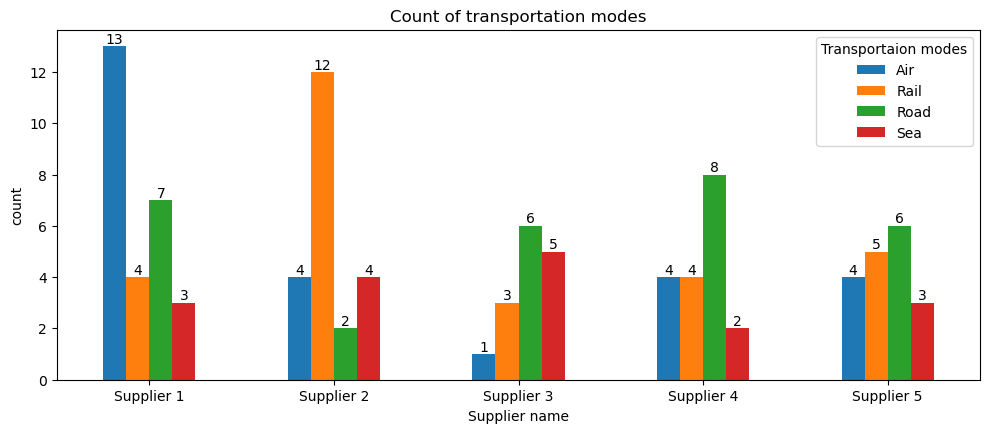

In [37]:
ax = pivoted_data.plot(kind ='bar', figsize=(10,5))
plt.title('Count of transportation modes')
plt.xlabel('Supplier name')
plt.ylabel('count')
plt.legend(title='Transportaion modes')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [38]:
cosmetics_data = df[df['Product type']=='cosmetics']
grouped_data = cosmetics_data.groupby(['Supplier name', 'Transportation modes']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Supplier name', columns='Transportation modes', values = 'Count')
pivoted_data = pivoted_data.fillna(0)
print(pivoted_data)

Transportation modes  Air  Rail  Road  Sea
Supplier name                             
Supplier 1            3.0   2.0   1.0  1.0
Supplier 2            0.0   4.0   1.0  2.0
Supplier 3            0.0   0.0   1.0  0.0
Supplier 4            0.0   1.0   2.0  1.0
Supplier 5            2.0   2.0   1.0  2.0


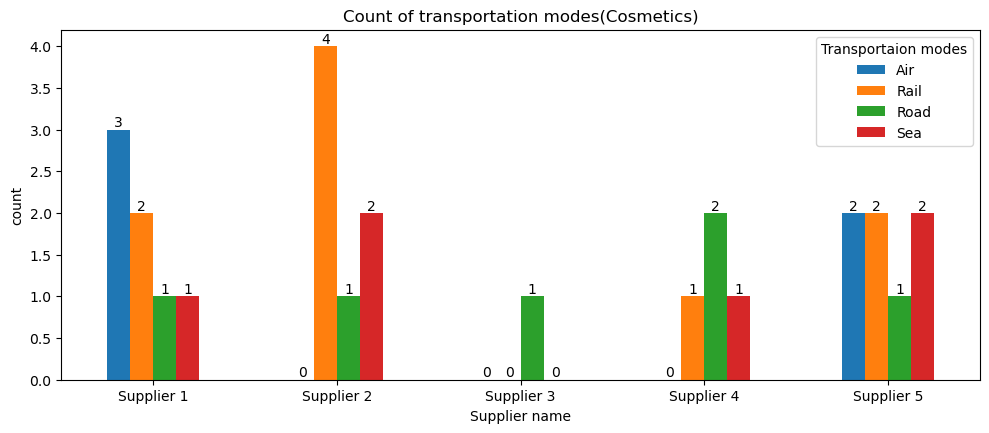

In [39]:
ax = pivoted_data.plot(kind ='bar', figsize=(10,5))
plt.title('Count of transportation modes(Cosmetics)')
plt.xlabel('Supplier name')
plt.ylabel('count')
plt.legend(title='Transportaion modes')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In [20]:
haircare_data = df[df['Product type']=='haircare']
grouped_data = haircare_data.groupby(['Supplier name', 'Transportation modes']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Supplier name', columns='Transportation modes', values = 'Count')
pivoted_data = pivoted_data.fillna(0)
print(pivoted_data)

Transportation modes  Air  Rail  Road  Sea
Supplier name                             
Supplier 1            1.0   0.0   4.0  0.0
Supplier 2            1.0   7.0   0.0  2.0
Supplier 3            1.0   1.0   2.0  1.0
Supplier 4            3.0   2.0   5.0  0.0
Supplier 5            2.0   0.0   1.0  1.0


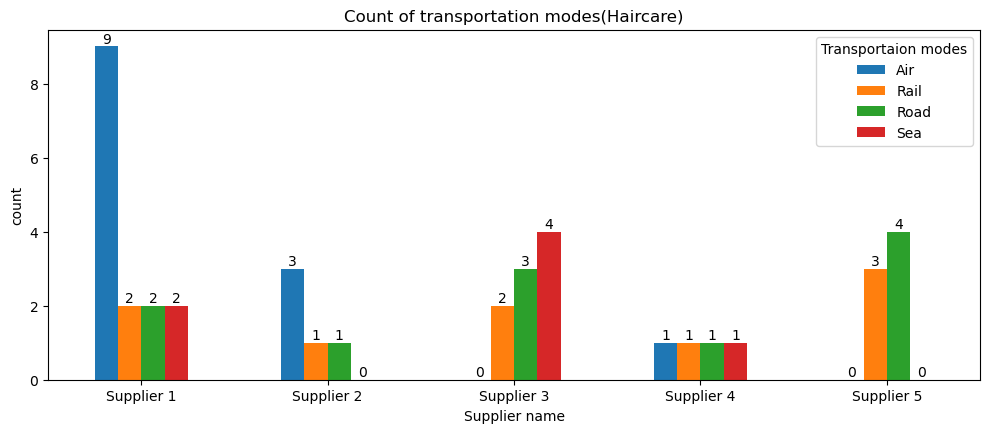

In [29]:
ax = pivoted_data.plot(kind ='bar', figsize=(10,5))
plt.title('Count of transportation modes(Haircare)')
plt.xlabel('Supplier name')
plt.ylabel('count')
plt.legend(title='Transportaion modes')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In [23]:
skincare_data = df[df['Product type']=='skincare']
grouped_data = skincare_data.groupby(['Supplier name', 'Transportation modes']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Supplier name', columns='Transportation modes', values = 'Count')
pivoted_data = pivoted_data.fillna(0)
print(pivoted_data)

Transportation modes  Air  Rail  Road  Sea
Supplier name                             
Supplier 1            9.0   2.0   2.0  2.0
Supplier 2            3.0   1.0   1.0  0.0
Supplier 3            0.0   2.0   3.0  4.0
Supplier 4            1.0   1.0   1.0  1.0
Supplier 5            0.0   3.0   4.0  0.0


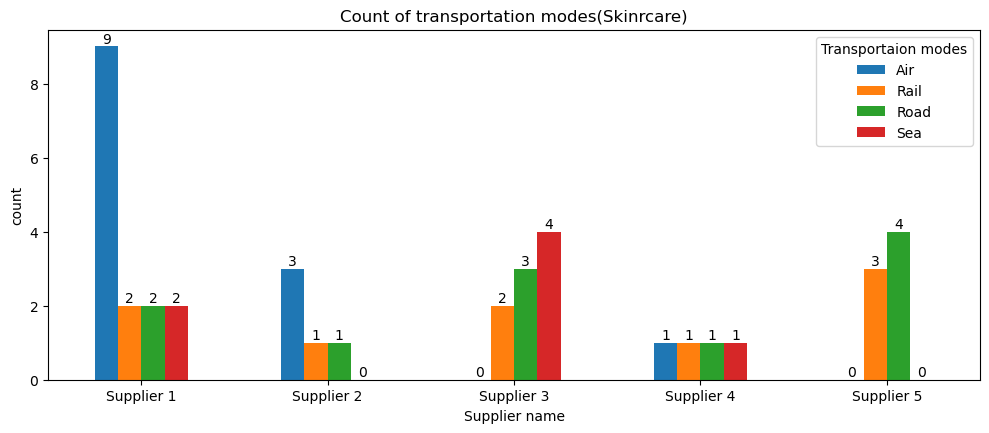

In [30]:
ax = pivoted_data.plot(kind ='bar', figsize=(10,5))
plt.title('Count of transportation modes(Skinrcare)')
plt.xlabel('Supplier name')
plt.ylabel('count')
plt.legend(title='Transportaion modes')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In [19]:
pivot_table_cost = pd.pivot_table(df, values='Costs', index= 'Supplier name', columns='Transportation modes', aggfunc='sum')
print(pivot_table_cost)

Transportation modes          Air         Rail         Road          Sea
Supplier name                                                           
Supplier 1            8291.140771  2041.301789  4337.984113   850.554073
Supplier 2            1942.929775  7051.267949   995.145624  1341.255950
Supplier 3             351.504219  1876.236015  2131.533978  2672.727311
Supplier 4            1974.417822  1974.072065  4663.016126   781.081505
Supplier 5            2044.534910  2226.053741  3920.513800  1457.306681


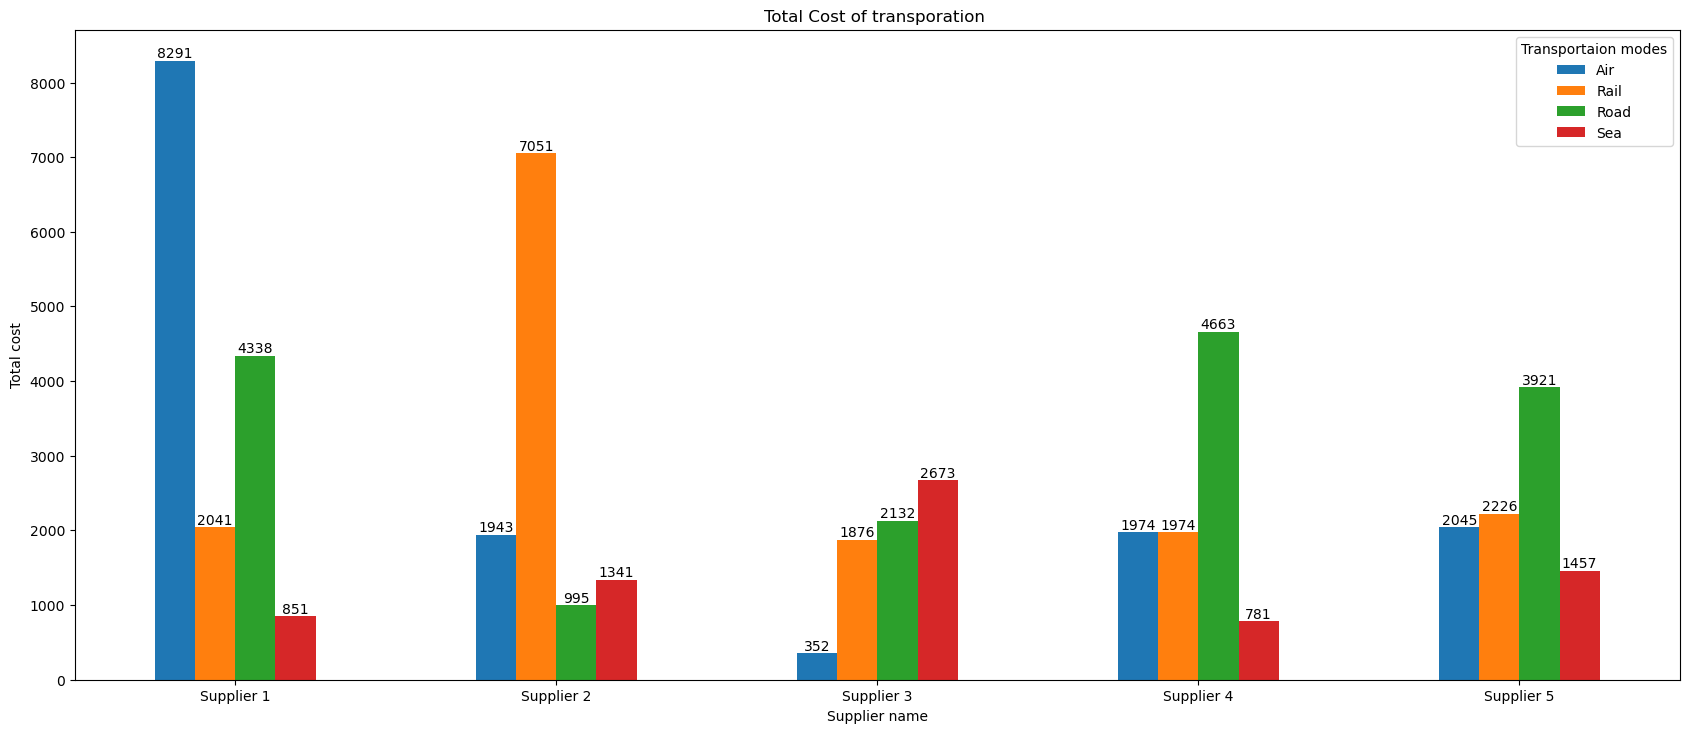

In [20]:
ax = pivot_table_cost.plot(kind='bar', figsize=(17,8))
plt.title('Total Cost of transporation ')
plt.xlabel('Supplier name')
plt.ylabel('Total cost')
plt.legend(title='Transportaion modes')
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In [34]:
pivot_table_defect = pd.pivot_table(df, values='Defect rates', index='Supplier name', columns='Transportation modes', aggfunc='sum')
print(pivot_table_defect)

Transportation modes        Air       Rail       Road        Sea
Supplier name                                                   
Supplier 1            21.331937   7.553082  16.875468   2.937515
Supplier 2             8.969986  27.416825   6.216628   9.377065
Supplier 3             0.165872   6.755929  16.277548  13.787442
Supplier 4            11.106522   6.466981  21.744485   2.755165
Supplier 5             5.847696  16.733972  14.893087  10.502595


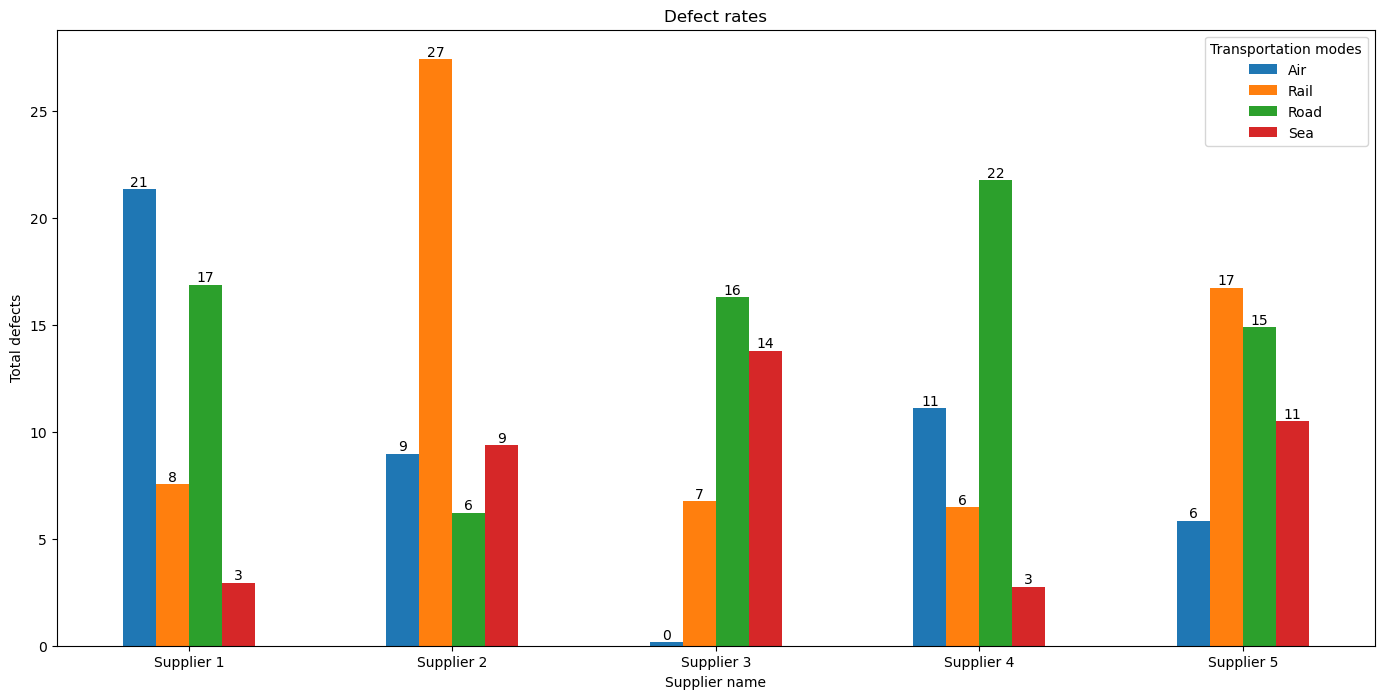

In [41]:
ax = pivot_table_defect.plot(kind = "bar", figsize=(17,8))
plt.title("Defect rates")
plt.xlabel('Supplier name')
plt.ylabel('Total defects')
plt.legend(title='Transportation modes')
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width()/2, p.get_height()), ha ='center', va = 'bottom')
plt.xticks(rotation=0)
plt.show()